## You will be using the dataset als_data.csv to apply clustering methods for this assignment. This data gives anonymized data on ALS patients. With this data, complete the following steps:

In [5]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.decomposition import PCA
import seaborn as sns

In [6]:
# import csv file into a dataframe
df = pd.read_csv ('als_data.csv') 
print(df)

        ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0        1        65         57.0            40.5         38.0       0.066202   
1        2        48         45.0            41.0         39.0       0.010453   
2        3        38         50.0            47.0         45.0       0.008929   
3        4        63         47.0            44.0         41.0       0.012111   
4        5        63         47.0            45.5         42.0       0.008292   
...    ...       ...          ...             ...          ...            ...   
2218  2419        33         50.0            49.0         45.0       0.008772   
2219  2420        61         47.0            45.0         42.0       0.009074   
2220  2421        47         46.0            44.0         41.0       0.012111   
2221  2422        37         49.0            44.0         39.0       0.017857   
2222  2424        48         48.0            45.0         40.0       0.018476   

      ALSFRS_slope  ALSFRS_

In [7]:
df.shape

(2223, 101)

### Remove any data that is not relevant to the patient’s ALS condition.

In [8]:
# The Patients' ID numbers are irrevant to the patient's ALS condition
df.drop(["SubjectID", "ID"], axis=1, inplace=True)

In [71]:
# Check to see that SubjectID and ID columns have been removed
df.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


In [10]:
# Double check to see that SubjectID and ID columns have been removed
df.shape

(2223, 99)

### Apply a standard scalar to the data.

In [11]:
## https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
# define standard scaler
scaler = StandardScaler()
# transform data
X = scaler.fit_transform(df)
print(X)

[[ 0.91713698  3.08941722 -1.30078105 ... -0.88037551  0.46305355
   1.86853157]
 [-0.57487867 -0.62201561 -1.11240084 ...  0.1926645  -1.13720768
  -0.41915124]
 [-1.45253494  0.92441474  1.14816173 ... -0.88037551 -1.13720768
  -0.41915124]
 ...
 [-0.6626443  -0.31272954  0.01788044 ...  2.33874452  0.46305355
  -0.41915124]
 [-1.54030057  0.61512867  0.01788044 ... -0.88037551 -1.13720768
  -0.41915124]
 [-0.57487867  0.3058426   0.39464087 ... -1.95341552 -1.13720768
  -0.41915124]]


In [16]:
# check the shape of X to ensure its the same as df
X.shape

(2223, 99)

In [17]:
## https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
# check that the normalized data has a mean of zero (or close to it) and a standard divation of one
np.mean(X),np.std(X)

(-8.908541299845311e-17, 1.0)

In [18]:
# define sum_of_squared_distances for Elbow Method
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\kadams\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


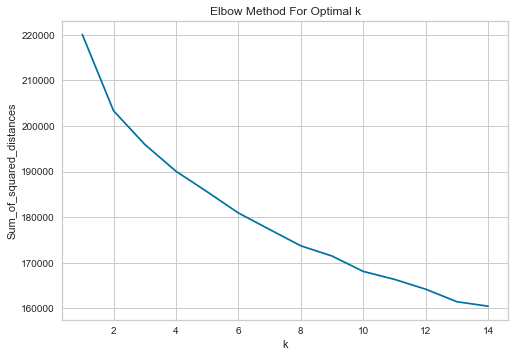

In [19]:
# Plot Elbow method to find K
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

For n_clusters = 2 The average silhouette_score is : 0.07878005888570402
For n_clusters = 3 The average silhouette_score is : 0.0687707291658565
For n_clusters = 4 The average silhouette_score is : 0.06973816142698218
For n_clusters = 5 The average silhouette_score is : 0.05697679932842005
For n_clusters = 6 The average silhouette_score is : 0.06477886829610223
For n_clusters = 7 The average silhouette_score is : 0.05187647631845004
For n_clusters = 8 The average silhouette_score is : 0.04954004349267961
For n_clusters = 9 The average silhouette_score is : 0.04393719582297171
For n_clusters = 10 The average silhouette_score is : 0.046121611845315456


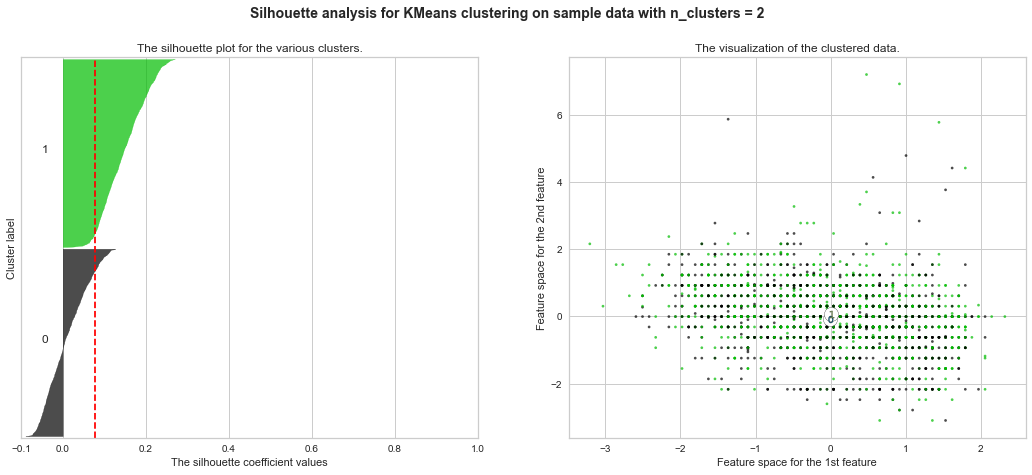

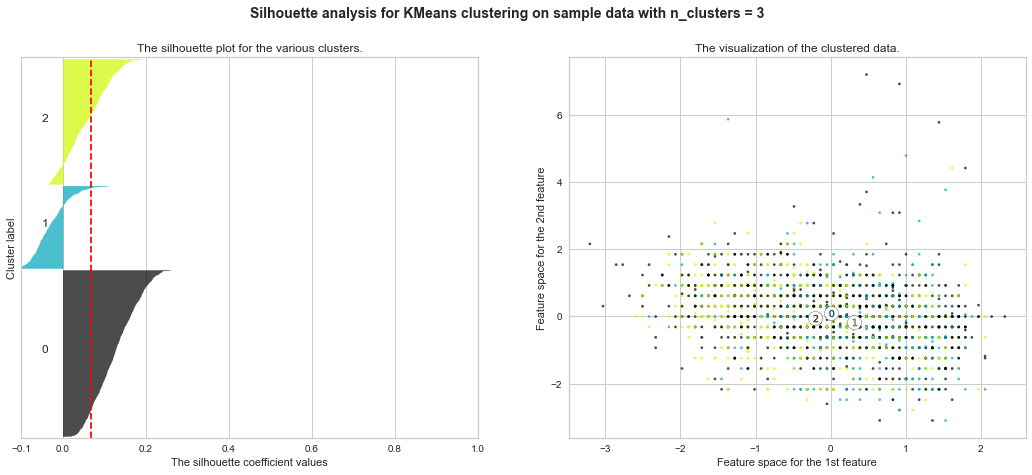

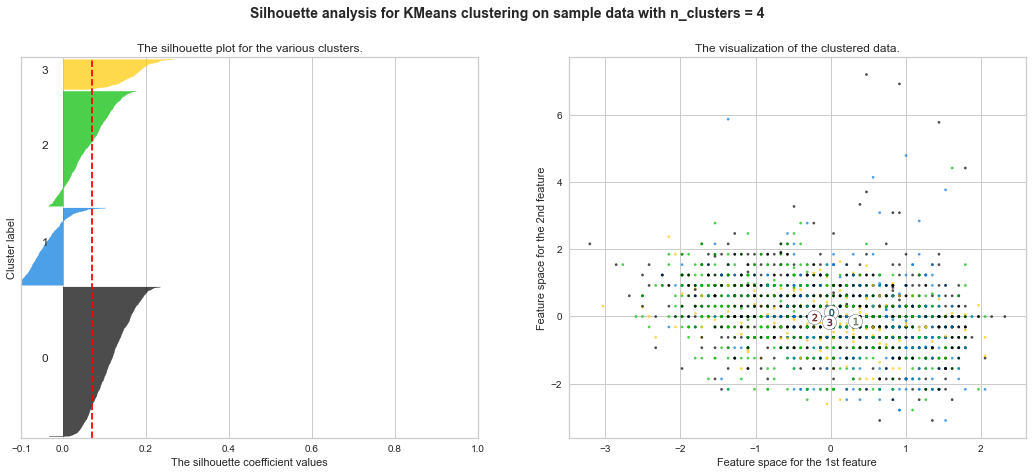

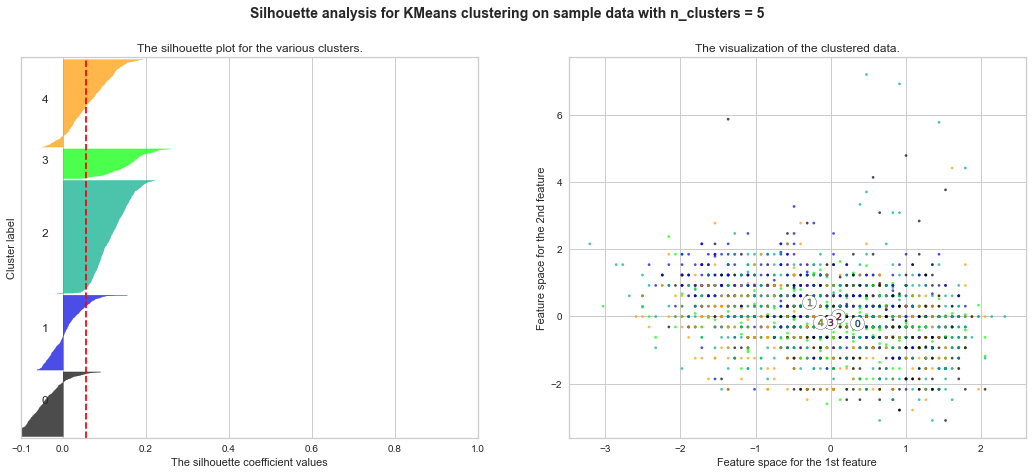

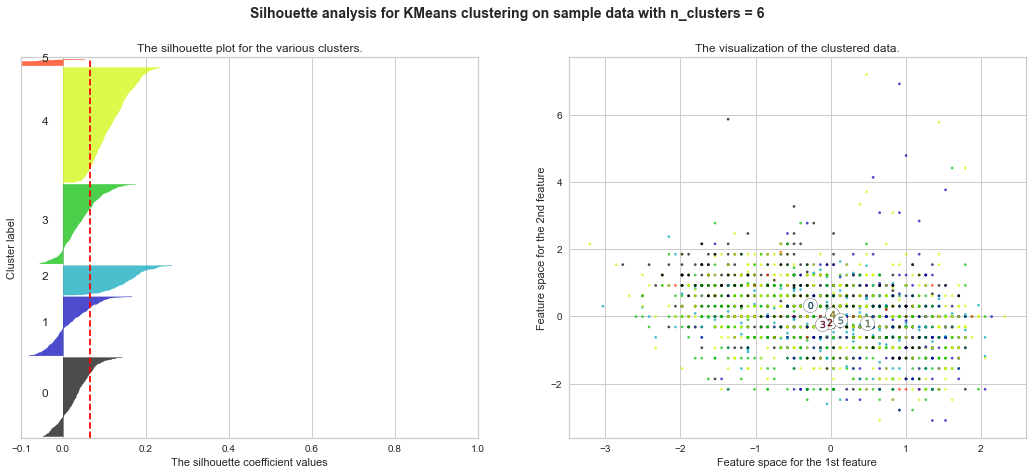

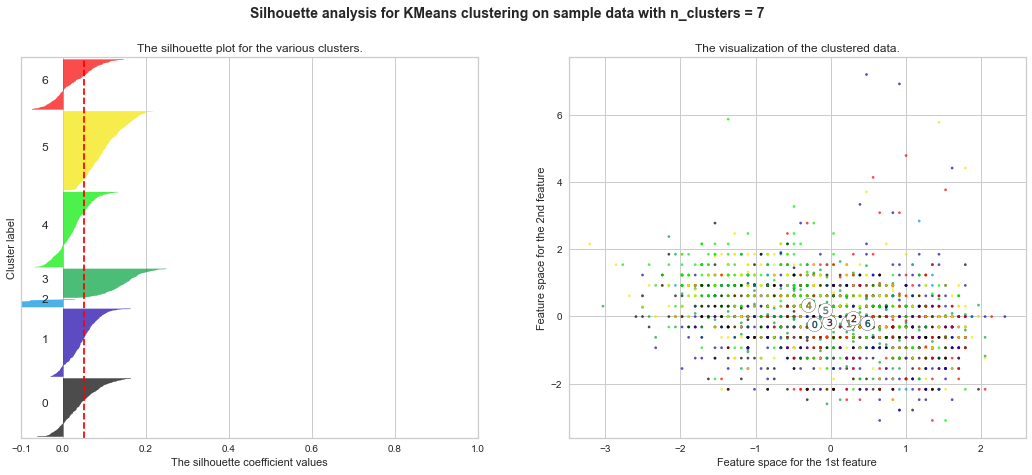

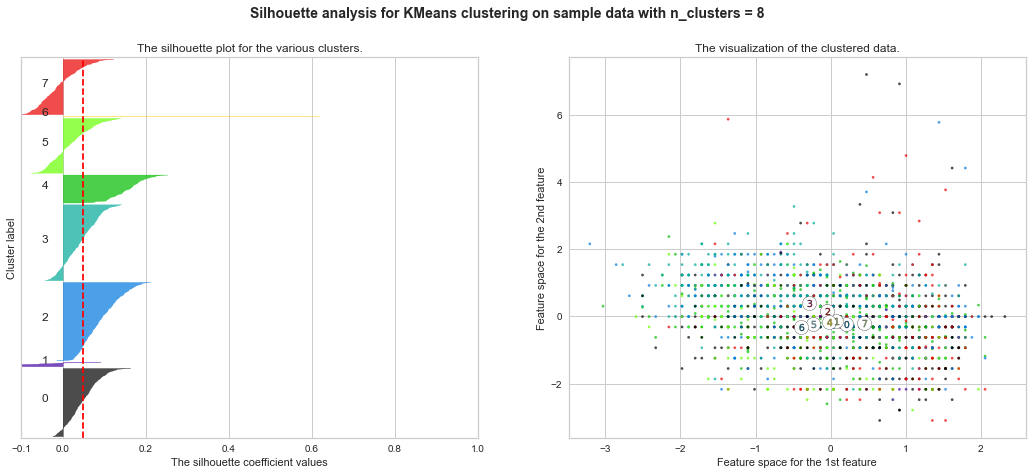

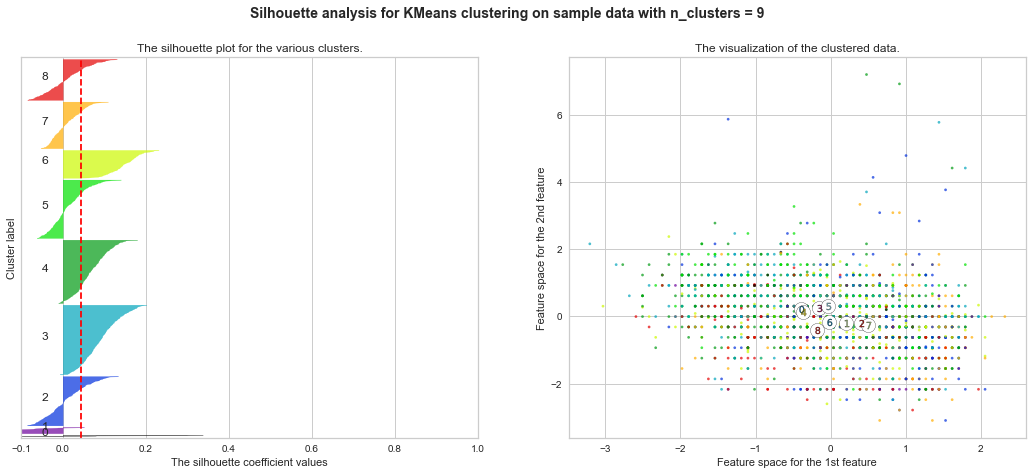

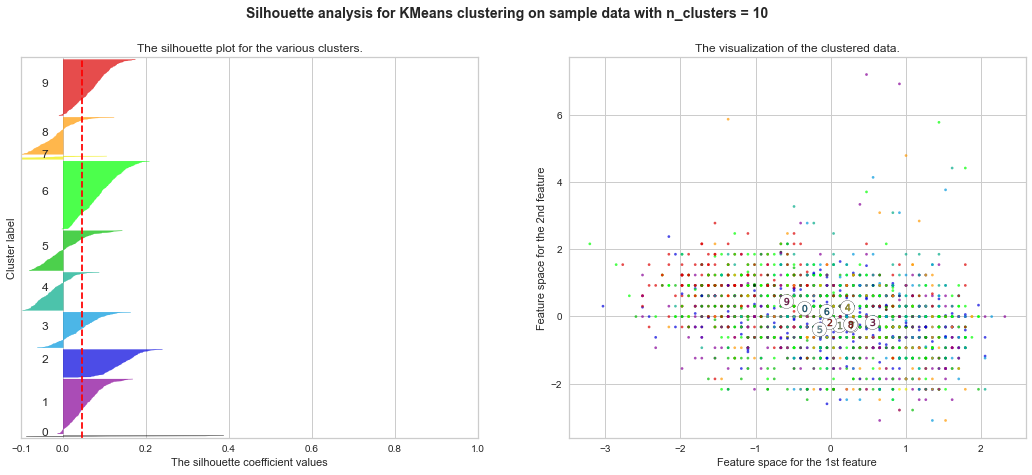

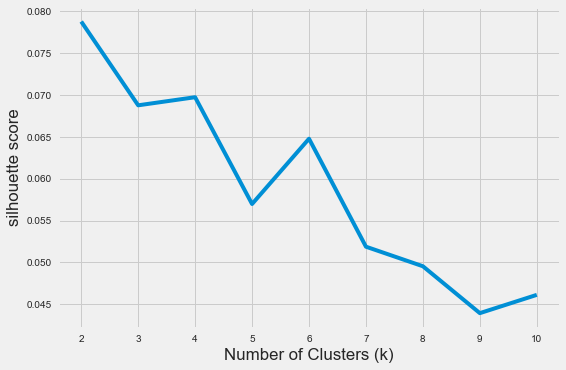

In [20]:
## https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

### Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

## Findings
$\bullet$ None of the silhouettes have clusters that are below-average silhouette scores, so none of the cluster values can be considered bad picks using this method. <br>
$\bullet$ Plotting the average silhouette scores for each k shows that the best choice for k is 2 since it has the maximum score (0.07878005888570402). This can also be validated in the Elbow method plot above.

### Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [21]:
kmeans = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)

In [22]:
kmeans.fit(X)

KMeans(init='random', n_clusters=2, random_state=42)

### Fit a PCA transformation with two features to the scaled data.

In [23]:
## https://365datascience.com/tutorials/python-tutorials/pca-k-means/
# PCA: Pass the number of components (n_components=2) and call fit_transform
pca_als = PCA(n_components=2)
pca_als.fit(X)

PCA(n_components=2)

In [24]:
# Transform PCA
pca_als.transform(X)

array([[-1.42673341, -2.31989839],
       [-1.44023783, -4.87132145],
       [ 1.61785635, -0.42944752],
       ...,
       [-0.43289422,  4.24419805],
       [-0.33078349,  3.31675927],
       [ 1.46799333,  0.5818427 ]])

In [25]:
# Calculate resulting components scores for the elements in the dataset (X)
scores_pca_als=pca_als.transform(X)

In [26]:
# Create a new dataframe with the original features and add the PCA scores and assigned clusters
df_segm_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca_als)], axis=1)

In [27]:
# Continuation of above cell
df_segm_pca_kmeans.columns.values[-2: ] = ['principal component 1', 'principal component 2']

In [28]:
# The last column we addd contains the pca k-means clustering labels
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans.labels_

In [29]:
# Add the names of the segments to the labels
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'first',1:'second', 2:'third', 3:'fourth'})

In [30]:
# Show the dataframe
df_segm_pca_kmeans.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,principal component 1,principal component 2,Segment K-means PCA,Segment
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,7.0,7,0.002646,6.0,6.0,6.0,-1.426733,-2.319898,0,first
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,7.0,5,0.005386,7.0,5.0,5.0,-1.440238,-4.871321,0,first
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,0.0,0,0.008929,6.0,5.0,5.0,1.617856,-0.429448,1,second
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,5.0,3,0.004988,7.0,6.0,5.0,-1.920001,2.095990,0,first
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,4.0,1,0.008489,6.0,5.0,5.0,0.297708,0.166982,1,second


In [31]:
print('Explained variation per principal component: {}'.format(pca_als.explained_variance_ratio_))

Explained variation per principal component: [0.11330548 0.06446613]


### Make a scatterplot the PCA transformed data coloring each point by its cluster value.

C:\Users\kadams\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


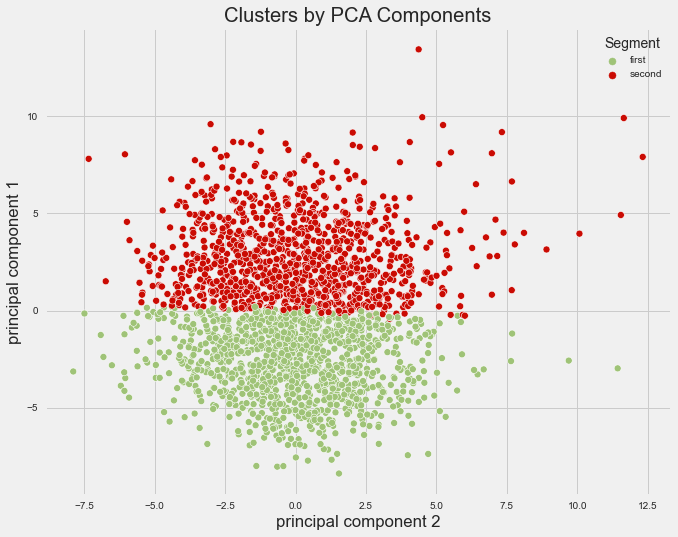

In [34]:
# Plot scatterplot of PCA transformed data coloring each point by its cluster value
x_axis = df_segm_pca_kmeans['principal component 2']
y_axis = df_segm_pca_kmeans['principal component 1']
plt.figure(figsize =(10,8))
sns.scatterplot(x_axis,y_axis, hue=df_segm_pca_kmeans['Segment'], palette = ['g', 'r'])
plt.title('Clusters by PCA Components')
plt.show()

### Summarize your results and make a conclusion.

$\bullet$ Adding both Eigen values together are 11.222290791521909+6.38501894187012, which is 17.6. By calculating percentage of total Eigen values (17.6), we find PC1 is about 64% (11/17) and PC2 is about 36% (3/17).  <br>
$\bullet$ This means that the Y axis accounts for 64% of the variation in the dataset, and X axis accounts for the remaining 36%. <br>
$\bullet$ As a next step outside of this assignment, we would look at which dataframe columns contribute the most to PC1 and PC2 using the Eigen vectors (positively and negatively). <br>

In [35]:
n_samples = 1000

In [42]:
# Find % explained by PC1 and PC2 (eigen values): https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca
# We center the data and compute the sample covariance matrix.
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca_als.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca_als.components_):    
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print("Eigen value is", eigenvalue)

24.935930140220083
Eigen value is 11.222290791521909
14.187516737537276
Eigen value is 6.38501894187012
